In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the datasets
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

In [3]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
# Step 3: Data Exploration
# - Check the first few rows of each dataset to understand the data structure
print(cab_data.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
print(customer_data.head())

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


In [7]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [8]:
print(transaction_data.head())

   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


In [9]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [10]:
print(city_data.head())

             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [11]:
merged_df = customer_data.merge(transaction_data, on='Customer ID', how='inner')
merged_df = merged_df.merge(cab_data, on='Transaction ID', how='left')
merged_df = merged_df.merge(city_data, on='City', how='left')

In [12]:
merged_df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash,43103.0,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,"1,177,609","27,247"
440094,14971,Male,30,15346,10439820,Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440095,41414,Male,38,3960,10439838,Card,43104.0,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,"631,442","5,712"
440096,41677,Male,23,19454,10439840,Cash,43106.0,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,"631,442","5,712"


In [13]:
# Remove duplicate rows
merged_df.drop_duplicates(inplace=True)

In [14]:
merged_df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash,43103.0,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,"1,177,609","27,247"
440094,14971,Male,30,15346,10439820,Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440095,41414,Male,38,3960,10439838,Card,43104.0,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,"631,442","5,712"
440096,41677,Male,23,19454,10439840,Cash,43106.0,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,"631,442","5,712"


In [15]:
# Convert a column to datetime
merged_df['Date of Travel'] = pd.to_datetime(merged_df['Date of Travel'], unit='D', origin='1899-12-30')

c:\Users\User1\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


In [16]:
merged_df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,"1,177,609","27,247"
440094,14971,Male,30,15346,10439820,Card,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440095,41414,Male,38,3960,10439838,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,"631,442","5,712"
440096,41677,Male,23,19454,10439840,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,"631,442","5,712"


In [17]:
merged_df.isnull().sum()

Customer ID               0
Gender                    0
Age                       0
Income (USD/Month)        0
Transaction ID            0
Payment_Mode              0
Date of Travel        80706
Company               80706
City                  80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
Population            80706
Users                 80706
dtype: int64

In [18]:
# Drop rows with any missing values in any column
merged_df.dropna(inplace=True)

In [19]:
merged_df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440092,38520,Female,42,19417,10439790,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,"671,238","25,063"
440093,12490,Male,33,18713,10439799,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,"1,177,609","27,247"
440095,41414,Male,38,3960,10439838,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,"631,442","5,712"
440096,41677,Male,23,19454,10439840,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,"631,442","5,712"


In [20]:
# Identify outliers in a numeric column using a z-score
from scipy import stats
# Iterate through all numeric columns
numeric_columns = merged_df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    z_scores = stats.zscore(merged_df[column])
    outliers = (z_scores > 3) | (z_scores < -3)
    merged_df = merged_df[~outliers]

In [21]:
merged_df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440092,38520,Female,42,19417,10439790,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,"671,238","25,063"
440093,12490,Male,33,18713,10439799,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,"1,177,609","27,247"
440095,41414,Male,38,3960,10439838,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,"631,442","5,712"
440096,41677,Male,23,19454,10439840,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,"631,442","5,712"


# **Hypothesis on DataSet**

## ***Hypothesis 1: Seasonal Variations in Cab Usage***

- Hypothesis: There is seasonality in the number of cab rides, and certain months exhibit higher cab usage than others.
- Investigation: Create a line plot to visualize the monthly trend in the number of cab rides.


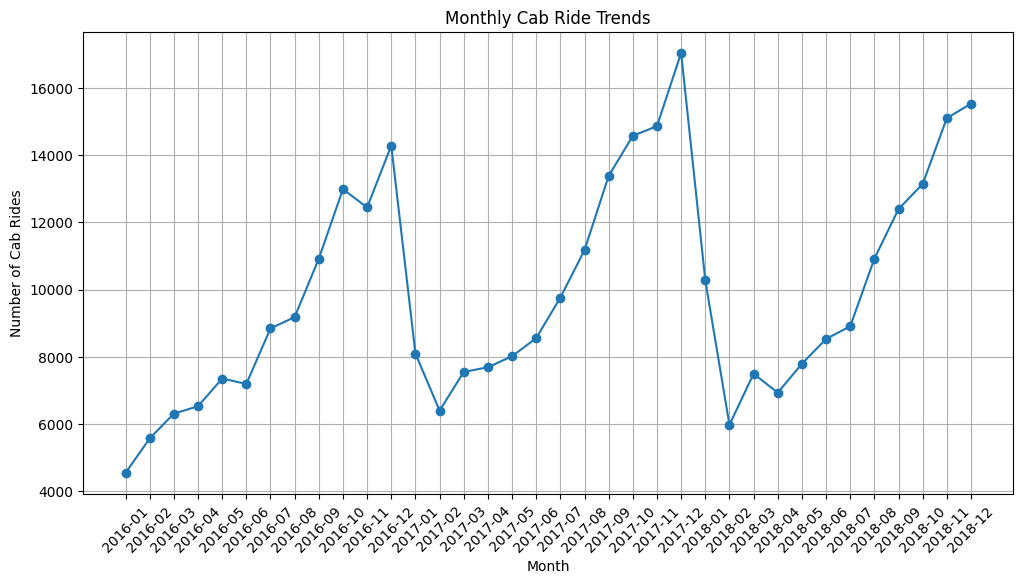

In [22]:
# Extract month and year from 'Date of Travel' column and create 'YearMonth' column
merged_df['YearMonth'] = merged_df['Date of Travel'].dt.to_period('M')

# Group data by 'YearMonth' and count rides
monthly_rides = merged_df.groupby('YearMonth')['Transaction ID'].count()

# Convert YearMonth Period object to string for plotting
monthly_rides.index = monthly_rides.index.strftime('%Y-%m')

# Create a line plot to show monthly cab ride trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_rides.index, monthly_rides.values, marker='o')
plt.title('Monthly Cab Ride Trends')
plt.xlabel('Month')
plt.ylabel('Number of Cab Rides')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## ***Hypothesis 2: Company with Maximum Cab Users***

- Hypothesis: One of the cab companies has more cab users at a particular time period.
- Investigation: Create a bar chart to compare the number of rides for each cab company.

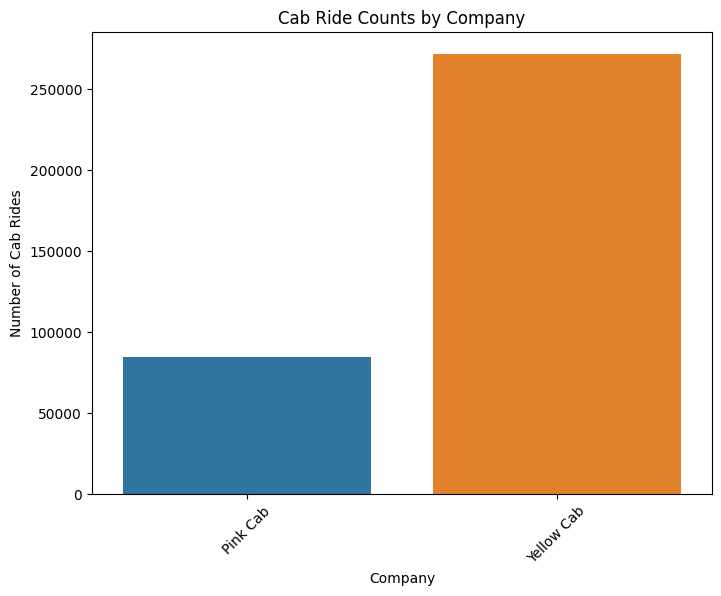

In [23]:
#Group data by company and count rides
company_rides = merged_df.groupby('Company')['Transaction ID'].count().reset_index()

# Create a bar chart to compare cab ride counts by company
plt.figure(figsize=(8, 6))
sns.barplot(x='Company', y='Transaction ID', data=company_rides)
plt.title('Cab Ride Counts by Company')
plt.xlabel('Company')
plt.ylabel('Number of Cab Rides')
plt.xticks(rotation=45)
plt.show()

## ***Hypothesis 3: Margin vs. Number of Customers***

- Hypothesis: The margin (profit) increases proportionally with the increase in the number of customers.
- Investigation: Create a scatter plot to explore the relationship between the number of customers and the margin.

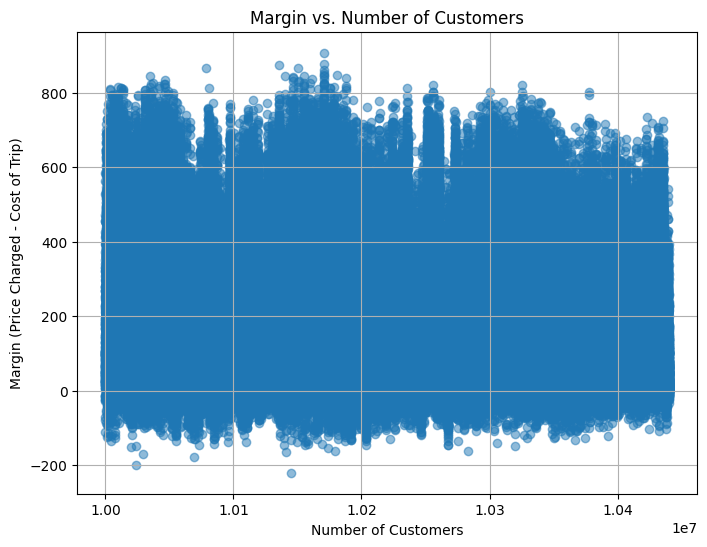

In [24]:
# Create a scatter plot of margin vs. number of customers
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Transaction ID'], merged_df['Price Charged'] - merged_df['Cost of Trip'], alpha=0.5)
plt.title('Margin vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Margin (Price Charged - Cost of Trip)')
plt.grid(True)
plt.show()

## ***Hypothesis 4: Cab Usage on Weekdays vs. Weekends***

- Hypothesis: Cab usage patterns differ between weekdays and weekends.
- Investigation: Create a bar plot to compare cab ride counts on weekdays and weekends.

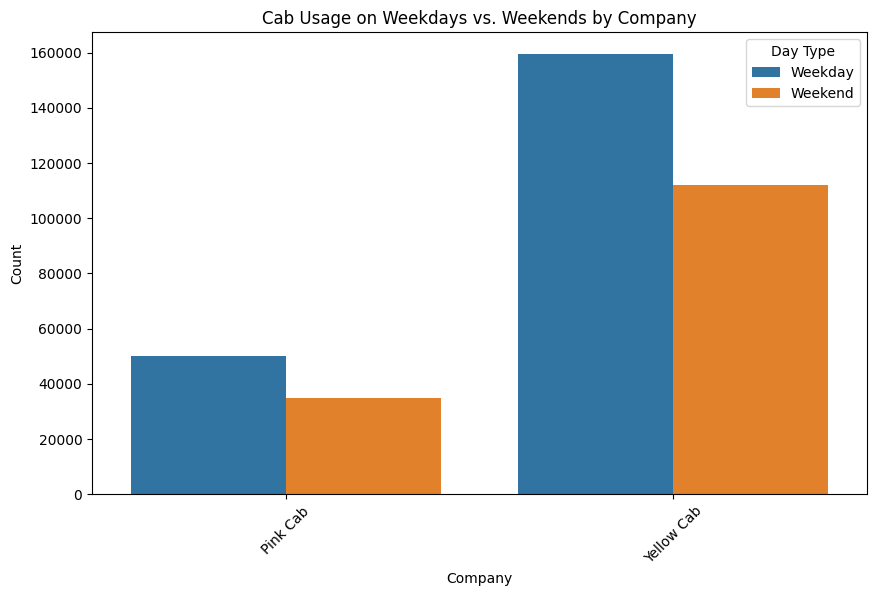

In [26]:
# Extract the day of the week from "Date of Travel" (0 = Monday, 6 = Sunday)
merged_df['DayOfWeek'] = merged_df['Date of Travel'].dt.dayofweek

# Map days of the week to 'Weekday' or 'Weekend'
day_type = {0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'}
merged_df['DayType'] = merged_df['DayOfWeek'].map(day_type)

# Create a bar plot to compare cab ride counts on weekdays and weekends by company
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Company', hue='DayType')
plt.title('Cab Usage on Weekdays vs. Weekends by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Day Type', loc='upper right')
plt.show()

## **Hypothesis 5: Gender-Based Customer Segments**

- Hypothesis: Customer segments based on gender have different preferences for cab companies.
- Investigation: Create a count plot to visualize the distribution of gender within each cab company.

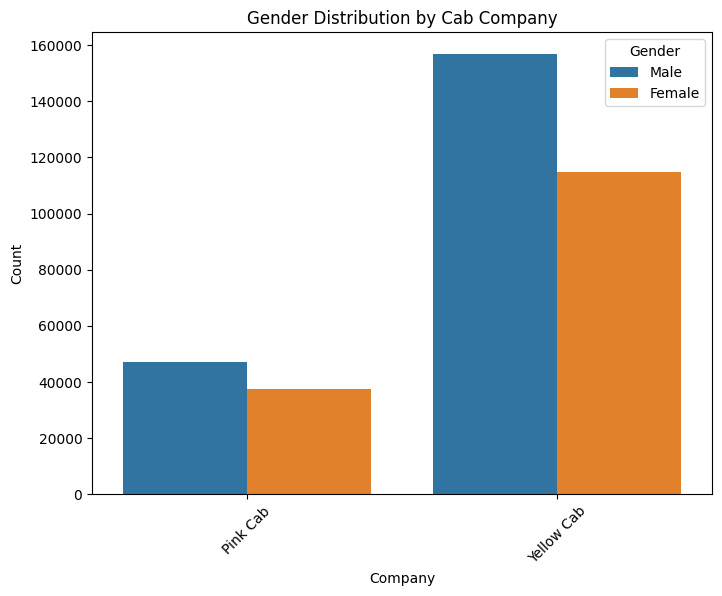

In [28]:
# Create a count plot of gender distribution by cab company
plt.figure(figsize=(8, 6))
sns.countplot(x='Company', hue='Gender', data=merged_df)
plt.title('Gender Distribution by Cab Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()

## ***Hypothesis 6: Distribution of cab rides in different cities***

- Hypothesis: The number of cab rides varies significantly across different cities.
- Investigation: Create a bar plot or count plot to visualize the distribution of cab rides by city, which will help determine if there are notable differences in cab ride frequency among various cities.

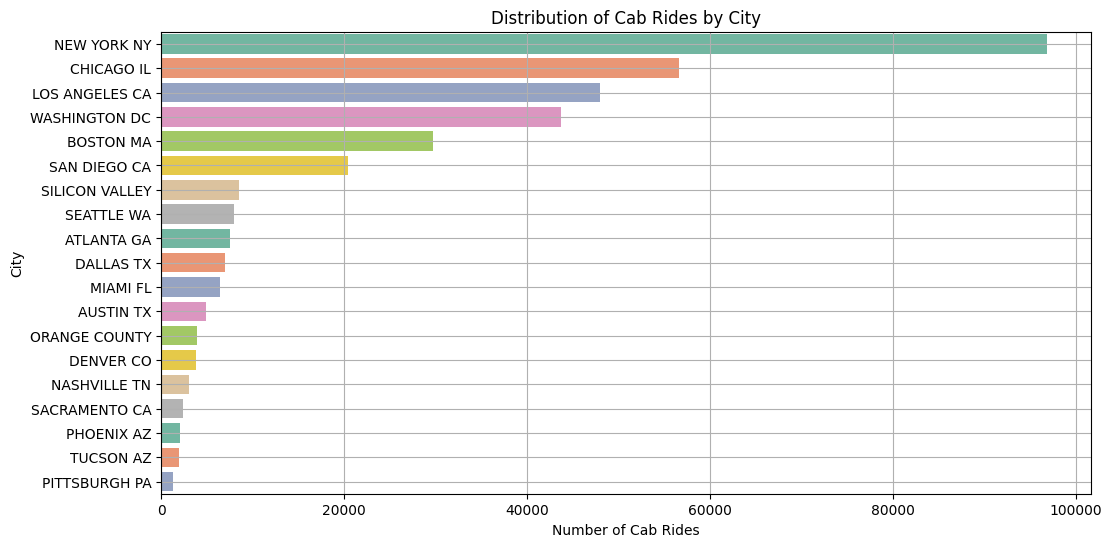

In [32]:
# Create a count plot to show the distribution of cab rides by City
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, y='City', palette='Set2', order=merged_df['City'].value_counts().index)
plt.title('Distribution of Cab Rides by City')
plt.xlabel('Number of Cab Rides')
plt.ylabel('City')
plt.grid(True)
plt.show()

## ***Hypothesis 7: Male and Female Travel Patterns by Day of the Week***

- Hypothesis: Male and female customers exhibit different travel patterns in terms of the day of the week when using cab services..
- Investigation: Create a count plot to compare travel patterns by gender and day of the week. This visualization will help identify any variations in travel behavior between male and female customers with respect to different days of the week.

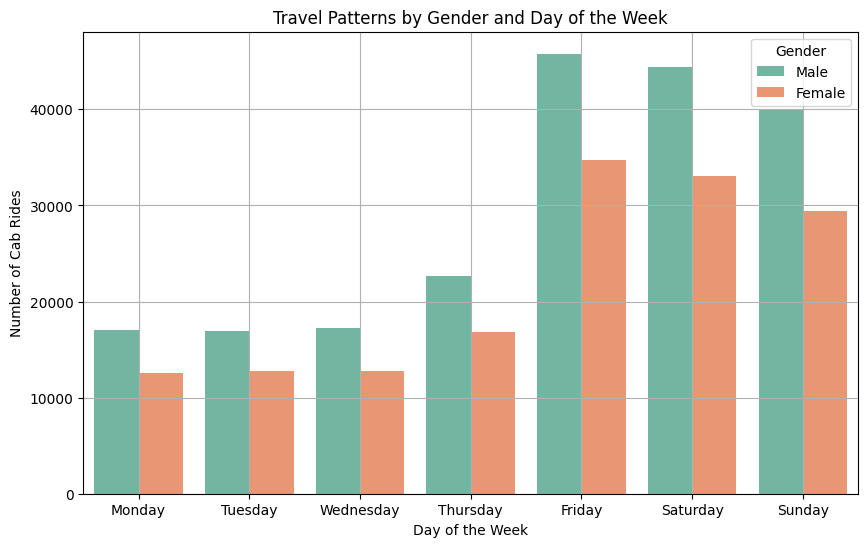

In [37]:
# Create a count plot to compare travel patterns by Gender and Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='DayOfWeek', hue='Gender', palette='Set2')

# Define custom day names for x-axis
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.title('Travel Patterns by Gender and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cab Rides')
plt.legend(title='Gender')
plt.grid(True)

# Set custom day labels on the x-axis
plt.xticks(range(7), day_names)

plt.show()

## ***Hypothesis 8: Company Performance and Investment Potential***

- Hypothesis: The financial performance of the two cab companies, Pink Cab and Yellow Cab, varies, and this performance can provide insights into their investment potential.
- Investigation: Analyze and compare the total revenue, total cost of the trip, and total profit for Pink Cab and Yellow Cab to determine which company shows better investment potential.

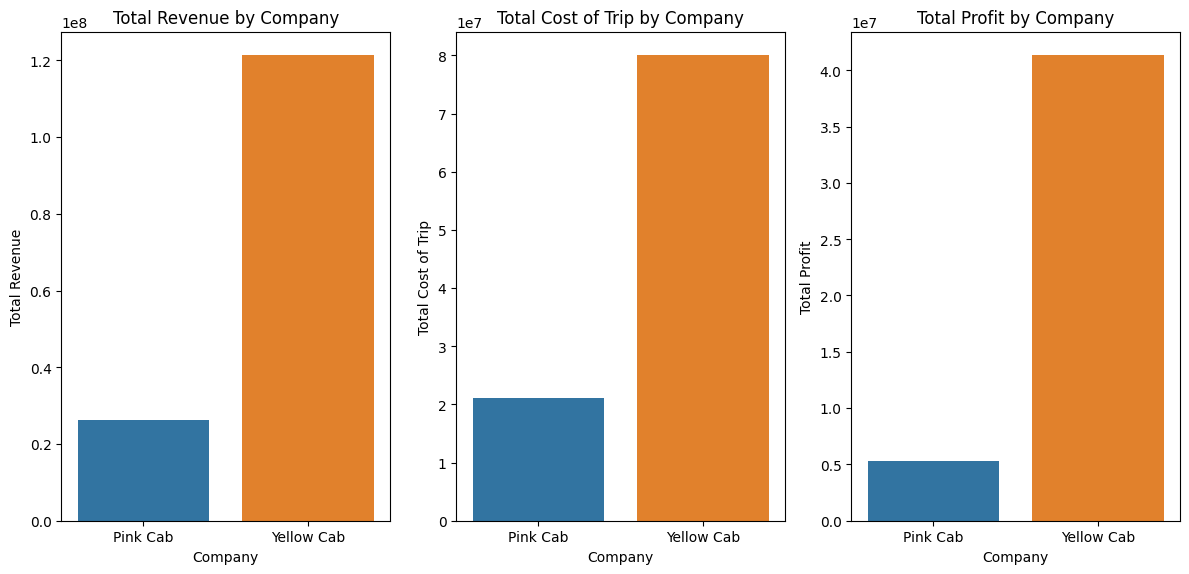

The better company to invest in is: Yellow Cab


In [39]:
# Calculate total revenue for each company
company_revenue = merged_df.groupby('Company')['Price Charged'].sum().reset_index()

# Calculate total cost of trip for each company
company_cost = merged_df.groupby('Company')['Cost of Trip'].sum().reset_index()

# Calculate total profit for each company
company_profit = company_revenue['Price Charged'] - company_cost['Cost of Trip']

# Calculate the total number of cab rides for each company
company_rides = merged_df['Company'].value_counts().reset_index()
company_rides.columns = ['Company', 'Number of Rides']

# Merge the metrics into a single DataFrame
company_performance = pd.merge(company_revenue, company_cost, on='Company')
company_performance['Total Profit'] = company_profit
company_performance = pd.merge(company_performance, company_rides, on='Company')

# Visualize the performance metrics
plt.figure(figsize=(12, 6))

# Plot total revenue
plt.subplot(1, 3, 1)
sns.barplot(data=company_performance, x='Company', y='Price Charged')
plt.title('Total Revenue by Company')
plt.xlabel('Company')
plt.ylabel('Total Revenue')

# Plot total cost of trip
plt.subplot(1, 3, 2)
sns.barplot(data=company_performance, x='Company', y='Cost of Trip')
plt.title('Total Cost of Trip by Company')
plt.xlabel('Company')
plt.ylabel('Total Cost of Trip')

# Plot total profit
plt.subplot(1, 3, 3)
sns.barplot(data=company_performance, x='Company', y='Total Profit')
plt.title('Total Profit by Company')
plt.xlabel('Company')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

# Based on the analysis, make a recommendation for investment
better_investment = None
if company_performance['Total Profit'].iloc[0] > company_performance['Total Profit'].iloc[1]:
    better_investment = company_performance['Company'].iloc[0]
else:
    better_investment = company_performance['Company'].iloc[1]

print(f"The better company to invest in is: {better_investment}")